This code will make a LNP model from gray scale stim input (WxLxT) to binary output (CxT)
W (width), H (hieght), T (duration), C (number cells)
JC 2019-1-5

In [11]:
# import
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

In [12]:
# free paramters
W=40 # (um)
H=35 # (um)
T=1000 # (ms)
srf_width = 20 # (um) width of gaussian srf
trf_tau = 100 # (ms) tau of exponential trf
trf_delay = 100 # (ms) delay of expontential trf
trf_tauLength = 3 # number of tau that trf extends

# calculated from free parameters
C = int(np.ceil(W/srf_width)*np.ceil(H/srf_width)) # (number) of cells in grid
trf_l = trf_tau*trf_tauLength # length of trf
print(C) # print the number of cell

4


In [2]:
5+\
  3+\
    2

10

In [17]:
# make trf
trf  = np.exp((np.arange(-trf_l,trf_l+1)-trf_delay)/-trf_tau) # decaying exponential with delay
trf[0:trf_l+trf_delay]=0

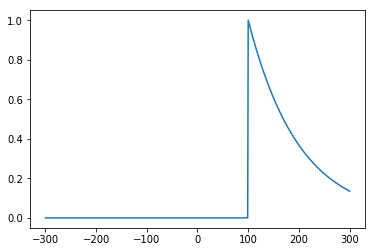

In [18]:
# sanity check

# plot trf
%matplotlib inline
plt.plot(np.arange(-trf_l,trf_l+1),trf)
plt.show()

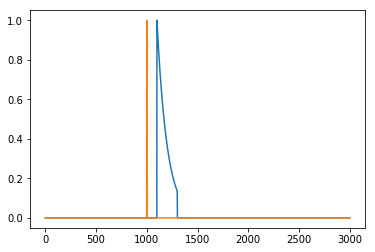

In [19]:
# sanity check

# plot trf pulse response
temp=np.zeros(3000)
temp[1000]=1
temp2 = np.convolve(trf,temp,'same')

plt.plot(temp2)
plt.plot(temp)
plt.show()

In [20]:
# make stim (white noise)

Stim = np.random.normal(256/2,256/4,(W,H,T)) # normal random

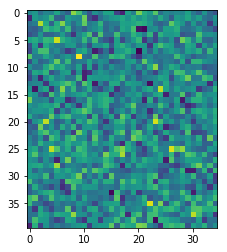

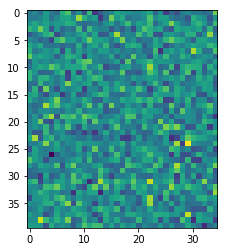

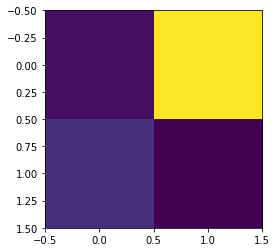

97.6202413601
64.0087313549
128.018292922


In [21]:
# sanity check

# plot 2 random frames of stim
f = np.random.randint(0,T,(2))
plt.imshow(Stim[:,:,f[0]])
plt.show()
plt.imshow(Stim[:,:,f[1]])
plt.show()

# plot corner of second random frame and print value
plt.imshow(Stim[0:2,0:2,f[1]])
plt.show()
print(Stim[0,0,f[1]])

# print std and mean of stim
print(np.std(Stim)) # computed on flattened array by default
print(np.mean(Stim))
del f

In [22]:
def srfMaker(W,H,srf_center,srf_width): # make gaussian srf 

    #import pdb; pdb.set_trace() # debug line
    ax = np.arange(H)-srf_center[0]
    ay = np.arange(W)-srf_center[1]
    xx, yy = np.meshgrid(ax, ay)

    srf = np.exp(-(xx**2 + yy**2) / (2. * srf_width**2))
    srf = srf/np.sum(srf)
    
    return srf   

In [23]:
# make cell srf
ax=np.arange(srf_width/2,W,srf_width)
ay=np.arange(srf_width/2,H,srf_width)
xx,yy = np.meshgrid(ax,ay)

srf = np.empty((W,H,C)) # srf(W,H,cell)
F = np.empty((W,H,C,T)) # filter(W,H,cell,time) 
for ci in range(C): # for each cell
    srf_center = [xx.flat[ci],yy.flat[ci]]
    srf[:,:,ci] = srfMaker(W,H,srf_center,srf_width)
    for ti in range(trf_l):
        F[:,:,ci,ti] = srf[:,:,ci]*trf[ti] 



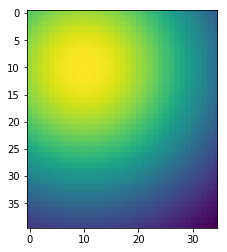

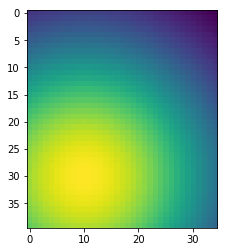

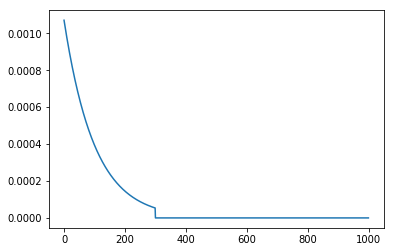

In [12]:
plt.imshow(F[:,:,0,0])
plt.show()

plt.imshow(F[:,:,2,0])
plt.show()

plt.plot(F[10,10,0,:])
plt.show()

In [24]:
# dot product over space
sdot = np.empty((C,T))
for ci in range(C): # for each cell
    for ti in range(T): # for each time point in StimLong
        sdot[ci,ti] = np.sum(srf[:,:,ci]*Stim[:,:,ti])
        

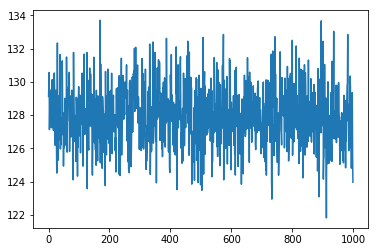

In [157]:
# sanity check

plt.plot(sdot[0,:])
plt.show()

In [25]:
# convoluation over time 
lp = np.empty((C,T))
sdot2 = sdot - np.mean(sdot)
for ci in range(C): # for each cell
    lp[ci,:] = np.convolve(sdot2[ci,:],trf,'same')
    

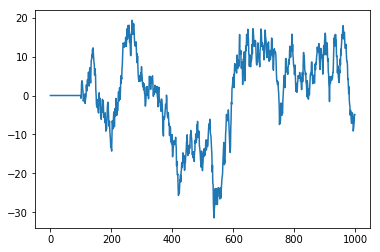

In [26]:
# sanity check

# %matplotlib notebook
plt.plot(lp[0,:])
plt.show()

In [27]:
# implement exponential non-linearity

R = lp**2 ;

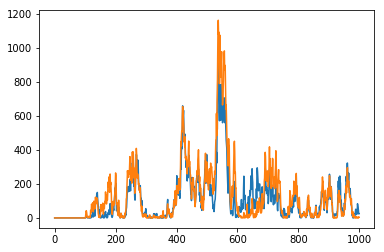

In [28]:
%matplotlib inline

plt.plot(R[0,:])
plt.plot(R[1,:])
plt.show()